In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

# Overfitting & Underfitting


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듬
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듬
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 과대적합

## 네트워크 크기 축소

imdb 의 영화리뷰 분류문제의 원래 네트워크

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

더 작은 네트워크 

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

원본 네트워크와 축소된 네트워크의 검증 손실을 비교
점으로 표현된 것이 작은 네트워크이고 덧셈 기호가 원래 네트워크 입니다(검증 손실이 작은 것이 좋은 모델).

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 341us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 5s 212us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 7s 291us/step - loss: 0.1991 - acc: 0.9292 - val_loss: 0.2821 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 7s 285us/step - loss: 0.1666 - acc: 0.9412 - val_loss: 0.2939 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.1435 - acc: 0.9501 - val_loss: 0.3116 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 7s 294us/step - loss: 0.1257 - acc: 0.9558 - val_loss: 0.3483 - val_acc: 0.8721
Epoch 7/20
25000/25000 [==============================] - 7s 287us/step - loss: 0.1104 - acc: 0.9615 - val_loss: 0.3598 - 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 306us/step - loss: 0.5670 - acc: 0.7410 - val_loss: 0.4849 - val_acc: 0.8256
Epoch 2/20
25000/25000 [==============================] - 7s 295us/step - loss: 0.3924 - acc: 0.8895 - val_loss: 0.3609 - val_acc: 0.8780
Epoch 3/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.2791 - acc: 0.9174 - val_loss: 0.3012 - val_acc: 0.8879
Epoch 4/20
25000/25000 [==============================] - 7s 296us/step - loss: 0.2213 - acc: 0.9278 - val_loss: 0.2823 - val_acc: 0.8900
Epoch 5/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.1877 - acc: 0.9375 - val_loss: 0.2816 - val_acc: 0.8863
Epoch 6/20
25000/25000 [==============================] - 7s 286us/step - loss: 0.1649 - acc: 0.9448 - val_loss: 0.2858 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 7s 297us/step - loss: 0.1467 - acc: 0.9518 - val_loss: 0.2954 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [8]:
import matplotlib.pyplot as plt

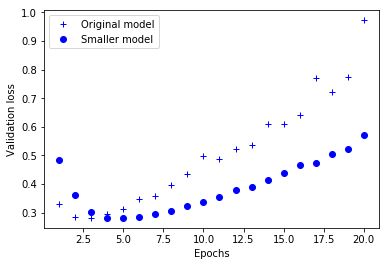

In [9]:
# ‘b+’는 파란색 덧셈 기호을 의미
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 작은 네트워크가 기본 네트워크보다 더 나중에 과대적합되기 시작했습니다(네 번째 에포크가 아니라 여섯 번째 에포크에서). 과대적합이 시작되었을 때 성능이 더 천천히 감소되었습니다.

이번에는 문제에 필요한 것보다 훨씬 더 많은 용량을 가진 네트워크를 비교해 보겠습니다:

In [10]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 12s 494us/step - loss: 0.5454 - acc: 0.7882 - val_loss: 0.2760 - val_acc: 0.8891
Epoch 2/20
25000/25000 [==============================] - 11s 452us/step - loss: 0.2188 - acc: 0.9147 - val_loss: 0.3125 - val_acc: 0.8754
Epoch 3/20
25000/25000 [==============================] - 11s 451us/step - loss: 0.1151 - acc: 0.9607 - val_loss: 0.3470 - val_acc: 0.8831
Epoch 4/20
25000/25000 [==============================] - 11s 450us/step - loss: 0.0658 - acc: 0.9850 - val_loss: 0.4694 - val_acc: 0.8829
Epoch 5/20
25000/25000 [==============================] - 11s 448us/step - loss: 0.0979 - acc: 0.9854 - val_loss: 0.4798 - val_acc: 0.8785
Epoch 6/20
25000/25000 [==============================] - 11s 452us/step - loss: 0.0027 - acc: 0.9996 - val_loss: 0.6154 - val_acc: 0.8806
Epoch 7/20
25000/25000 [==============================] - 11s 457us/step - loss: 8.7515e-04 - acc: 0.9998 - val_loss

다음은 더 큰 네트워크가 기본 네트워크에 비해 얼마나 차이나는지를 보여줍니다. 점이 용량이 큰 네트워크의 검증 손실이고 덧셈 기호는 원본 네트워크의 검증 손실입니다.

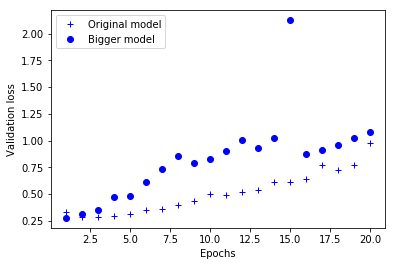

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해집니다. 검증 손실도 매우 불안정합니다.

다음은 두 네트워크의 train loss 입니다.

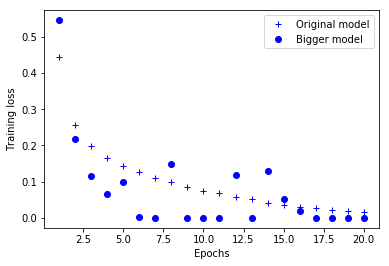

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 용량이 큰 네트워크는 훈련 손실이 매우 빠르게 0에 가까워집니다. 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링할 수 있습니다(결국 훈련 손실이 낮아집니다). 하지만 더욱 과대적합에 민감해집니다(결국 훈련과 검증 손실 사이에 큰 차이가 발생합니다).

## 가중치 규제 추가

In [14]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)`는 가중치 행렬의 모든 원소를 제곱하고 `0.001`을 곱하여 네트워크의 전체 손실에 더해진다는 의미입니다. 이 페널티 항은 훈련할 때만 추가됩니다. 이 네트워크의 손실은 테스트보다 훈련할 때 더 높을 것입니다.

L2 규제 페널티의 효과

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 309us/step - loss: 0.4879 - acc: 0.8152 - val_loss: 0.3895 - val_acc: 0.8656
Epoch 2/20
25000/25000 [==============================] - 7s 291us/step - loss: 0.3100 - acc: 0.9061 - val_loss: 0.3306 - val_acc: 0.8891
Epoch 3/20
25000/25000 [==============================] - 8s 313us/step - loss: 0.2657 - acc: 0.9202 - val_loss: 0.3301 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 8s 307us/step - loss: 0.2459 - acc: 0.9286 - val_loss: 0.3413 - val_acc: 0.8821
Epoch 5/20
25000/25000 [==============================] - 8s 322us/step - loss: 0.2323 - acc: 0.9352 - val_loss: 0.3818 - val_acc: 0.8685
Epoch 6/20
25000/25000 [==============================] - 7s 287us/step - loss: 0.2237 - acc: 0.9390 - val_loss: 0.3676 - val_acc: 0.8752
Epoch 7/20
25000/25000 [==============================] - 7s 291us/step - loss: 0.2173 - acc: 0.9409 - val_loss: 0.3748 - 

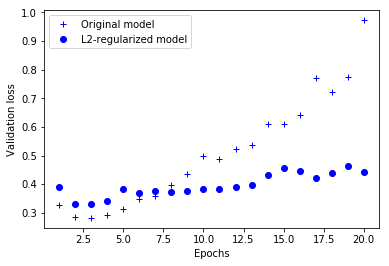

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델(점)이 기본 모델(덧셈 기호)보다 훨씬 더 과대적합에 잘 견디고 있습니다.

케라스에서 L2 규제 대신에 다음과 같은 가중치 규제 중 하나를 사용할 수 있습니다:

```python
from keras import regularizers

# L1 규제
regularizers.l1(0.001)

# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)
```

### l1(0.0001) 모델과 비교

In [18]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [20]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 311us/step - loss: 0.5502 - acc: 0.8246 - val_loss: 0.4253 - val_acc: 0.8731
Epoch 2/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.3636 - acc: 0.8954 - val_loss: 0.3726 - val_acc: 0.8845
Epoch 3/20
25000/25000 [==============================] - 7s 290us/step - loss: 0.3272 - acc: 0.9053 - val_loss: 0.3768 - val_acc: 0.8760
Epoch 4/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.3062 - acc: 0.9136 - val_loss: 0.3538 - val_acc: 0.8876
Epoch 5/20
25000/25000 [==============================] - 7s 285us/step - loss: 0.2960 - acc: 0.9168 - val_loss: 0.3573 - val_acc: 0.8856
Epoch 6/20
25000/25000 [==============================] - 7s 284us/step - loss: 0.2886 - acc: 0.9203 - val_loss: 0.3910 - val_acc: 0.8734
Epoch 7/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.2796 - acc: 0.9244 - val_loss: 0.3803 - 

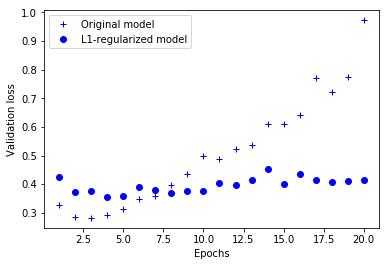

In [21]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### l1_l2(l1=0.0001, l2=0.0001)모델과 비교

In [22]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [24]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 317us/step - loss: 0.5541 - acc: 0.8168 - val_loss: 0.4444 - val_acc: 0.8563
Epoch 2/20
25000/25000 [==============================] - 7s 290us/step - loss: 0.3722 - acc: 0.8947 - val_loss: 0.3823 - val_acc: 0.8836
Epoch 3/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.3349 - acc: 0.9060 - val_loss: 0.3799 - val_acc: 0.8813
Epoch 4/20
25000/25000 [==============================] - 7s 285us/step - loss: 0.3230 - acc: 0.9091 - val_loss: 0.3646 - val_acc: 0.8873
Epoch 5/20
25000/25000 [==============================] - 8s 320us/step - loss: 0.3103 - acc: 0.9144 - val_loss: 0.3834 - val_acc: 0.8783
Epoch 6/20
25000/25000 [==============================] - 8s 321us/step - loss: 0.3045 - acc: 0.9174 - val_loss: 0.3732 - val_acc: 0.8852
Epoch 7/20
25000/25000 [==============================] - 8s 317us/step - loss: 0.2968 - acc: 0.9190 - val_loss: 0.3726 - 

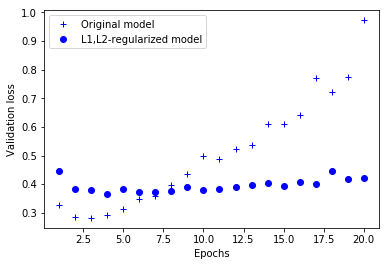

In [25]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 드롭아웃 추가

```python
model.add(layers.Dropout(0.5))
```

IMDB 네트워크에 두 개의 `Dropout` 층을 추가하고 과대적합을 얼마나 줄여주는지 확인

In [26]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [27]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 317us/step - loss: 0.5963 - acc: 0.6720 - val_loss: 0.4509 - val_acc: 0.8563
Epoch 2/20
25000/25000 [==============================] - 7s 291us/step - loss: 0.4414 - acc: 0.8197 - val_loss: 0.3414 - val_acc: 0.8836
Epoch 3/20
25000/25000 [==============================] - 7s 289us/step - loss: 0.3557 - acc: 0.8696 - val_loss: 0.2940 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 7s 288us/step - loss: 0.2968 - acc: 0.9008 - val_loss: 0.2823 - val_acc: 0.8896
Epoch 5/20
25000/25000 [==============================] - 7s 286us/step - loss: 0.2575 - acc: 0.9134 - val_loss: 0.2827 - val_acc: 0.8896
Epoch 6/20
25000/25000 [==============================] - 7s 290us/step - loss: 0.2298 - acc: 0.9246 - val_loss: 0.2863 - val_acc: 0.8879
Epoch 7/20
25000/25000 [==============================] - 7s 286us/step - loss: 0.2073 - acc: 0.9342 - val_loss: 0.3196 - 

결과 그래프

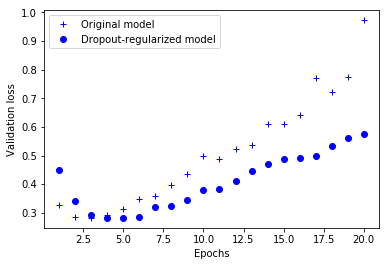

In [28]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()